In [26]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download as nltk_download
import matplotlib.pyplot as plt
from pprint import pprint
nltk_download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Lendo os dados e separando as colunas que utilizaremos para a analise

In [27]:
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
reviews = reviews[["review_score", "review_comment_message"]]
reviews = reviews.dropna()
reviews.head()

,review_score,review_comment_message
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
9,4,aparelho eficiente. no site a marca do aparelh...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,5,"Vendedor confiável, produto ok e entrega antes..."


Pegando apenas os reviews negativos, pois são neles aonde conseguimos descobrir o que a empresam pode melhorar para melhor atender os seus clientes 

In [28]:
# get the reviews with less than 3 stars
unfavorable = reviews[reviews.review_score <= 3]
unfavorable.reset_index(drop=True, inplace=True)
unfavorable.columns = ["score", "comment"]
unfavorable.head()


,score,comment
0,2,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E..."
1,1,Péssimo
2,1,Não gostei ! Comprei gato por lebre
3,1,Sempre compro pela Internet e a entrega ocorre...
4,1,Nada de chegar o meu pedido.


In [52]:

def not2negativo(comment):
    return comment.replace("nao", "negativo")

comments = unfavorable.comment.apply(not2negativo)
unfavorable.comment = comments

C:\Users\rafae\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
sw = stopwords.words('portuguese')
vec = TfidfVectorizer(max_features=500, stop_words=sw, ngram_range=(3, 3))
X = vec.fit_transform(unfavorable.comment)

In [42]:
keywords = []
n_keywords = 5
for doc in range(X.shape[0]): # para cada documento
    wordlist = []
    for word in vec.vocabulary_.keys(): # para cada palavra
        word_idx = vec.vocabulary_[word]
        if X[doc, word_idx] > 0:
            wordlist.append( (X[doc,word_idx], word) )
    wordlist = sorted(wordlist, reverse=True)
    keywords.append(wordlist[0:n_keywords])

In [45]:
k = {}
for i in keywords:
    for j in i:
        if j[1] in k:
            k[j[1]] += 1
        else:
            k[j[1]] = 1

# sort the keywords by frequency
k = sorted(k.items(), key=lambda x: x[1], reverse=True)
# pprint(k[0:20])

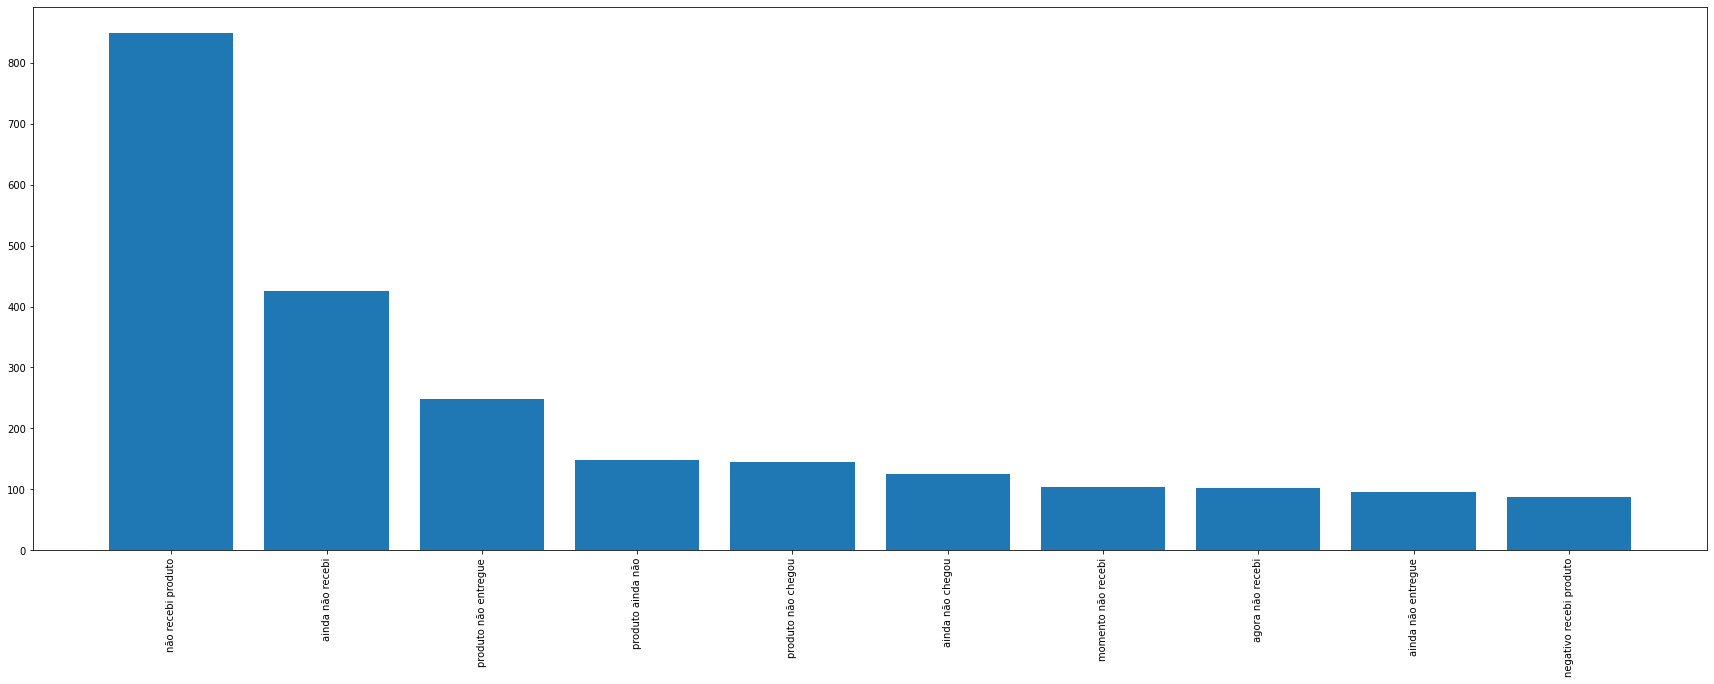

In [49]:
# plot the top 20 keywords
plt.figure(figsize=(30,10))
plt.bar(range(10), [i[1] for i in k[0:10]], align='center')
plt.xticks(range(10), [i[0] for i in k[0:10]], rotation=90)
plt.show()

In [ ]:
# create a new collumn if the comment is about delivery time
delivery = []
for comment in unfavorable.comment:
    if "negativo recebi" in comment or "negativo recebi" in comment:
        delivery.append(True)
    else:
        delivery.append(False)
unfavorable["delayed_delivery"] = delivery